In [1]:
# !pip install tensorflow
# !pip install keras

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime 
from datetime import timedelta

In [4]:
import math
from datetime import date
import datetime as dt

In [5]:
# pd.set_option('display.max_rows', None)

In [6]:
#sales = pd.read_excel("C:/Users/jenny/Desktop/빅콘/2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)/01_제공데이터/sales.xlsx",header= 1)

In [7]:
# sales['방송일시'] = pd.to_datetime(sales['방송일시'])
# sales['time'] = datatime['방송일시'].dt.time

In [8]:
# pd.Series(sales['time'].unique()).sort_values()

In [9]:
datatime = pd.read_csv("C:/Users/jenny/Desktop/빅콘/2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)/01_제공데이터/n_data_minute_stamp.csv",encoding='euc-kr')
display(datatime.head(20), datatime.shape)

,방송일시,노출,상품명,week_number,minute_stamp,saled,마더코드,상품코드,판매단가,상품군
0,2019.1.1 6:00,20,테이트 남성 셀린니트3종,1,180,26,100346,201072,39900,의류
1,2019.1.1 6:00,20,테이트 남성 셀린니트3종,1,181,26,100346,201072,39900,의류
2,2019.1.1 6:20,20,테이트 남성 셀린니트3종,1,182,41,100346,201072,39900,의류
3,2019.1.1 6:20,20,테이트 남성 셀린니트3종,1,183,41,100346,201072,39900,의류
4,2019.1.1 6:40,20,테이트 남성 셀린니트3종,1,184,84,100346,201072,39900,의류
5,2019.1.1 6:40,20,테이트 남성 셀린니트3종,1,185,84,100346,201072,39900,의류
6,2019.1.3 0:00,20,테이트 남성 셀린니트3종,1,432,92,100346,201072,39900,의류
7,2019.1.3 0:00,20,테이트 남성 셀린니트3종,1,433,92,100346,201072,39900,의류
8,2019.1.3 0:20,20,테이트 남성 셀린니트3종,1,434,132,100346,201072,39900,의류
9,2019.1.3 0:20,20,테이트 남성 셀린니트3종,1,435,132,100346,201072,39900,의류


(75723, 10)

In [10]:
datatime[datatime['상품명'] == '뉴트리원 다이어트 구미']

,방송일시,노출,상품명,week_number,minute_stamp,saled,마더코드,상품코드,판매단가,상품군


In [11]:
#datatime['minute_stamp'].sort_values().unique()

In [12]:
#datatime['week_number'].sort_values().unique()

minute_stamp 0에서 1009까지

week_number  1에서 53까지

In [13]:
# datatime[datatime['minute_stamp']== 180 ].head(20)

10분 단위의 평균이 들어갔고, 20분 방송시 2타임으로 나뉘어서, 평균 판매수량이 들어감

In [14]:
datatime['방송일시'] = pd.to_datetime(datatime['방송일시'])

방송일시가 object 형식이므로, datetime 형식으로 변경. 

Gaussian smoothing 가중치 계산을 위해 날짜(date) col 임의로 추가 

In [15]:
datatime['date'] = datatime['방송일시'].dt.date
datatime['time'] = datatime['방송일시'].dt.time
datatime['weekday'] = datatime['방송일시'].dt.weekday

In [16]:
datatime.dtypes

방송일시            datetime64[ns]
노출                       int64
상품명                     object
week_number              int64
minute_stamp             int64
saled                    int64
마더코드                     int64
상품코드                     int64
판매단가                     int64
상품군                     object
date                    object
time                    object
weekday                  int64
dtype: object

### 잠시 확인

In [17]:
a = dt.time(0, 0, 0) #import conflicting 주의

In [18]:
df = datatime[(datatime['time'] ==  a ) & (datatime['weekday'] ==  1)]
df

,방송일시,노출,상품명,week_number,minute_stamp,saled,마더코드,상품코드,판매단가,상품군,date,time,weekday
1339,2019-02-12,20,비버리힐스폴로클럽 남성기초세트(2018FW골드),7,144,196,100074,200197,39800,이미용,2019-02-12,00:00:00,1
1340,2019-02-12,20,비버리힐스폴로클럽 남성기초세트(2018FW골드),7,145,196,100074,200197,39800,이미용,2019-02-12,00:00:00,1
2812,2019-02-26,20,마리노블 밍크 롱코트,9,144,20,100049,202043,399000,의류,2019-02-26,00:00:00,1
2813,2019-02-26,20,마리노블 밍크 롱코트,9,145,20,100049,202043,399000,의류,2019-02-26,00:00:00,1
3153,2019-01-15,20,레이프릴 무빙 맥시풀커버 브라팬티,3,144,80,100193,200652,69900,속옷,2019-01-15,00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73806,2019-12-03,20,일시불쿠첸압력밥솥 6인용,49,145,60,100448,201391,148000,주방,2019-12-03,00:00:00,1
74069,2019-12-31,20,푸마 스트레치 심리스 드로즈 11종,1,144,253,100610,201883,89000,속옷,2019-12-31,00:00:00,1
74070,2019-12-31,20,푸마 스트레치 심리스 드로즈 11종,1,145,253,100610,201883,89000,속옷,2019-12-31,00:00:00,1
74141,2019-12-31,20,푸마 시그니처 코튼 트렁크 9종,1,144,27,100610,201884,89000,속옷,2019-12-31,00:00:00,1


In [19]:
df = datatime[(datatime['time'] ==  a ) & (datatime['weekday'] ==  0)]

In [20]:
#datatime['time'].unique()

In [21]:
# sorted(datatime['time'].unique())

## Gaussian smoothing

#### 예측대상일로부터 거리가 가까울수록 예측에 중요하다고 가정하고, 예측대상일과 과거 판매일간의 시간거리에 반비례하는 가중치를 적용한 가중평균을 사용한다. 

#### d_target(예측대상일) : 2020-01-31 로 임의 설정

In [22]:
d_target = date(2020,1,31)

In [23]:
datatime['date_diff'] = abs(d_target-datatime['date'])

In [24]:
datatime['date_diff'] = datatime['date_diff'].dt.days.astype('int')

In [25]:
datatime.dtypes

방송일시            datetime64[ns]
노출                       int64
상품명                     object
week_number              int64
minute_stamp             int64
saled                    int64
마더코드                     int64
상품코드                     int64
판매단가                     int64
상품군                     object
date                    object
time                    object
weekday                  int64
date_diff                int32
dtype: object

In [26]:
# datatime['time_stamp'] = datatime['minute_stamp'].apply(lambda x : x-144*datatime['weekday'] )

In [27]:
# SVD에 맞게 재조정
datatime['time_stamp'] = datatime['minute_stamp'] -144*datatime['weekday'] 

In [28]:
#sorted(datatime['time_stamp'].unique())

# 16부터 35까지 존재하지 않는다

In [29]:
# datatime = datatime[['방송일시',  '노출','date','weekday','time','date_diff','상품명', 'week_number','time_stamp','saled','마더코드','상품코드','상품군', '판매단가']]

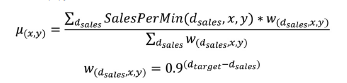

분모 : 모든 날짜의 가중치 w합
분자 : (상품x의 y시간대 분당 판매량 * w) 의 모든 날짜합

In [30]:
datatime['w'] = 0.9**(datatime['date_diff'])
# 이때 date_diff는 date에만 영향을 받으므로, 동일날짜의 w는 동일하다.

## 가중치 분자/분모 만들기

In [31]:
# temp = pd.DataFrame(xony.groupby(['상품명','date']).max())
# temp

In [32]:
# good_tot_w = temp.groupby(['상품명']).sum(['w'])
# good_tot_w = good_tot_w.drop(['time_stamp', 'saled'], axis = 1)
# good_tot_w

In [33]:
xony = pd.DataFrame(datatime[['상품명', 'date','time_stamp', 'w', 'saled']])
xony.head()

,상품명,date,time_stamp,w,saled
0,테이트 남성 셀린니트3종,2019-01-01,36,8.429295e-19,26
1,테이트 남성 셀린니트3종,2019-01-01,37,8.429295e-19,26
2,테이트 남성 셀린니트3종,2019-01-01,38,8.429295e-19,41
3,테이트 남성 셀린니트3종,2019-01-01,39,8.429295e-19,41
4,테이트 남성 셀린니트3종,2019-01-01,40,8.429295e-19,84


In [34]:
#xony.groupby(['date','상품명','time']).agg({'saled' : np.sum, 'w' : np.max})

In [35]:
pd.set_option('display.max_rows', 30)

In [36]:
# xony2 = xony.groupby(['상품명','date','time']).sum('saled')
# display(xony2.head(20), xony2.columns, xony.shape)

# 이러면 시작time관련 오류가 생겨
# 아래 empty dataframe도 이거 안되겠다 

### 여기 문제있음
우선 max 가지고함

In [37]:
xony2 = xony.groupby(['상품명','time_stamp','date']).agg({ 'w' : np.max , 'saled' : np.max}).reset_index()
display(xony2.head(20), xony2.columns, xony2.shape)

xony3 = xony.groupby(['상품명','time_stamp','date']).agg({ 'w' : np.max , 'saled' : np.mean}).reset_index()

# 날짜에 따른 w 및 sales 고정이므로, 변하지 않는다. 그러므로 max/mean 무엇을 취하든 상관없다.

,상품명,time_stamp,date,w,saled
0,뉴트리원 다이어트 구미,0,2019-07-24,1.821039e-09,250
1,뉴트리원 다이어트 구미,0,2019-08-02,4.700421e-09,158
2,뉴트리원 다이어트 구미,1,2019-07-24,1.821039e-09,250
3,뉴트리원 다이어트 구미,1,2019-08-02,4.700421e-09,158
4,뉴트리원 다이어트 구미,2,2019-07-24,1.821039e-09,389
5,뉴트리원 다이어트 구미,2,2019-08-02,4.700421e-09,226
6,뉴트리원 다이어트 구미,3,2019-07-24,1.821039e-09,389
7,뉴트리원 다이어트 구미,3,2019-08-02,4.700421e-09,226
8,뉴트리원 다이어트 구미,4,2019-07-24,1.821039e-09,430
9,뉴트리원 다이어트 구미,4,2019-08-02,4.700421e-09,286


Index(['상품명', 'time_stamp', 'date', 'w', 'saled'], dtype='object')

(75716, 5)

In [38]:
#xony2[xony2['time_stamp'] == 145]

In [39]:
display(xony2.iloc[[12418]],xony3.iloc[[12418]],xony2.iloc[[12703]],xony3.iloc[[12703]],xony2.iloc[[12893]],xony3.iloc[[12893]])

,상품명,time_stamp,date,w,saled
12418,[루이띠에] 18K 베르니아 귀걸이,4,2019-08-19,2.818474e-08,4


,상품명,time_stamp,date,w,saled
12418,[루이띠에] 18K 베르니아 귀걸이,4,2019-08-19,2.818474e-08,2.5


,상품명,time_stamp,date,w,saled
12703,[루이띠에] 18K 베르니아 주얼리 세트,4,2019-08-19,2.818474e-08,3


,상품명,time_stamp,date,w,saled
12703,[루이띠에] 18K 베르니아 주얼리 세트,4,2019-08-19,2.818474e-08,2.5


,상품명,time_stamp,date,w,saled
12893,[루이띠에] 18K 베르니아 팔찌 반지 세트,4,2019-08-19,2.818474e-08,1


,상품명,time_stamp,date,w,saled
12893,[루이띠에] 18K 베르니아 팔찌 반지 세트,4,2019-08-19,2.818474e-08,0.5


In [40]:
#xony[xony['상품명'] == ' [루이띠에] 18K 베르니아 반지' ]

In [41]:
#a = np.array(xony2['saled']-xony3['saled'])
#display(np.nonzero(a),np.dot(np.transpose(a),a))

In [42]:
xony2['boonja'] = xony2['w']*xony2['saled']
xony2.head(20)

,상품명,time_stamp,date,w,saled,boonja
0,뉴트리원 다이어트 구미,0,2019-07-24,1.821039e-09,250,4.552598e-07
1,뉴트리원 다이어트 구미,0,2019-08-02,4.700421e-09,158,7.426664e-07
2,뉴트리원 다이어트 구미,1,2019-07-24,1.821039e-09,250,4.552598e-07
3,뉴트리원 다이어트 구미,1,2019-08-02,4.700421e-09,158,7.426664e-07
4,뉴트리원 다이어트 구미,2,2019-07-24,1.821039e-09,389,7.083843e-07
5,뉴트리원 다이어트 구미,2,2019-08-02,4.700421e-09,226,1.062295e-06
6,뉴트리원 다이어트 구미,3,2019-07-24,1.821039e-09,389,7.083843e-07
7,뉴트리원 다이어트 구미,3,2019-08-02,4.700421e-09,226,1.062295e-06
8,뉴트리원 다이어트 구미,4,2019-07-24,1.821039e-09,430,7.830469e-07
9,뉴트리원 다이어트 구미,4,2019-08-02,4.700421e-09,286,1.344320e-06


In [43]:
xony3 = xony.groupby(['상품명','time_stamp'])['w'].sum('w').reset_index( name = 'boon_mo')
xony3.head()

,상품명,time_stamp,boon_mo
0,뉴트리원 다이어트 구미,0,6.521460e-09
1,뉴트리원 다이어트 구미,1,6.521460e-09
2,뉴트리원 다이어트 구미,2,6.521460e-09
3,뉴트리원 다이어트 구미,3,6.521460e-09
4,뉴트리원 다이어트 구미,4,6.521460e-09


In [44]:
xony4 = pd.merge(xony2, xony3[['상품명','boon_mo','time_stamp']], on =['상품명','time_stamp'], how = 'left')
xony4.head(20)

# boonmo same for w(x,y), even different dates b/c we summed it up

,상품명,time_stamp,date,w,saled,boonja,boon_mo
0,뉴트리원 다이어트 구미,0,2019-07-24,1.821039e-09,250,4.552598e-07,6.521460e-09
1,뉴트리원 다이어트 구미,0,2019-08-02,4.700421e-09,158,7.426664e-07,6.521460e-09
2,뉴트리원 다이어트 구미,1,2019-07-24,1.821039e-09,250,4.552598e-07,6.521460e-09
3,뉴트리원 다이어트 구미,1,2019-08-02,4.700421e-09,158,7.426664e-07,6.521460e-09
4,뉴트리원 다이어트 구미,2,2019-07-24,1.821039e-09,389,7.083843e-07,6.521460e-09
5,뉴트리원 다이어트 구미,2,2019-08-02,4.700421e-09,226,1.062295e-06,6.521460e-09
6,뉴트리원 다이어트 구미,3,2019-07-24,1.821039e-09,389,7.083843e-07,6.521460e-09
7,뉴트리원 다이어트 구미,3,2019-08-02,4.700421e-09,226,1.062295e-06,6.521460e-09
8,뉴트리원 다이어트 구미,4,2019-07-24,1.821039e-09,430,7.830469e-07,6.521460e-09
9,뉴트리원 다이어트 구미,4,2019-08-02,4.700421e-09,286,1.344320e-06,6.521460e-09


In [45]:
xony5 =xony4.groupby(['상품명', 'time_stamp']).agg({ 'boonja' : np.sum , 'boon_mo' : np.max}).reset_index()
xony5['mu'] = xony5['boonja']/xony5['boon_mo']
xony5.head(20)

,상품명,time_stamp,boonja,boon_mo,mu
0,뉴트리원 다이어트 구미,0,1.197926e-06,6.521460e-09,183.689894
1,뉴트리원 다이어트 구미,1,1.197926e-06,6.521460e-09,183.689894
2,뉴트리원 다이어트 구미,2,1.770679e-06,6.521460e-09,271.515790
3,뉴트리원 다이어트 구미,3,1.770679e-06,6.521460e-09,271.515790
4,뉴트리원 다이어트 구미,4,2.127367e-06,6.521460e-09,326.210269
5,뉴트리원 다이어트 구미,5,2.127367e-06,6.521460e-09,326.210269
6,뉴트리원 다이어트 구미,54,1.223322e-06,6.609809e-09,185.076836
7,뉴트리원 다이어트 구미,55,1.223322e-06,6.609809e-09,185.076836
8,뉴트리원 다이어트 구미,56,2.246375e-06,6.609809e-09,339.854790
9,뉴트리원 다이어트 구미,57,2.246375e-06,6.609809e-09,339.854790


In [46]:
xony6 = xony5.drop(['boonja', 'boon_mo'], axis = 1)
xony6

,상품명,time_stamp,mu
0,뉴트리원 다이어트 구미,0,183.689894
1,뉴트리원 다이어트 구미,1,183.689894
2,뉴트리원 다이어트 구미,2,271.515790
3,뉴트리원 다이어트 구미,3,271.515790
4,뉴트리원 다이어트 구미,4,326.210269
...,...,...,...
35175,히트융 극세사 퍼융기모 여성 동내의 패키지,93,196.656557
35176,히트융 극세사 퍼융기모 여성 동내의 패키지,94,152.000000
35177,히트융 극세사 퍼융기모 여성 동내의 패키지,95,152.000000
35178,히트융 극세사 퍼융기모 여성 동내의 패키지,96,398.000000


In [47]:
xony7 = xony6.pivot(index = '상품명', columns = 'time_stamp', values = 'mu')

In [48]:
cols = xony7.columns.tolist()
cols
cols = cols[16:126] + cols[0:16]

## col 순서바꾸기 : 36~145, 0~15순 ; 16-35 없어

In [49]:
xony8 = xony7[cols]
xony8=xony8.fillna(0)

In [50]:
#xony8.head(50)

In [51]:
xony9 =xony8

In [52]:
xony10 =xony8

In [53]:
a =list(range(0,126))
xony9.columns = a

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
xony9.iloc[28,125]

0.0

In [56]:
pd.set_option('display.max_columns', None)

## 가우시안 평활화

위에서 구한 mu는 가중평균으로, 
</br>
이제 매출기록이 없는 상품-시간대 조합의 예상매출을 주변시간대의 예상매출로 다음과 같이 추정한다

In [57]:
import scipy.stats 
scipy.stats.norm(0, 1).pdf(0)

0.3989422804014327

In [58]:
def pdf(x):
    a = scipy.stats.norm(0, 1).pdf(x)
    print(a)

In [59]:
xony8.iloc[29,:]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

In [60]:
scipy.stats.norm(0, 1).pdf(10)/scipy.stats.norm(0, 1).pdf(15)

1.3912498129508313e+27

In [61]:
display(xony8.iloc[1691,125], xony8.iloc[28,125],xony9.iloc[28,125])

0.0

0.0

0.0

In [62]:
xony8.iloc[28,125]

0.0

In [ ]:
for i in range(0,1692):
    for j in range(0,126):
        if  (xony9.iloc[i,j] == 0.0) :
            xony_t = xony9.iloc[i,:]
            nonzero = xony_t[xony_t != 0.0].index
            dists = j - nonzero
            hoobo = min(dists, key = abs, default = 0)
            min_index = j - hoobo
            f_mu = (scipy.stats.norm(0, 1).pdf(min_index-j)/scipy.stats.norm(0, 1).pdf(0))*(xony9.iloc[i,min_index])
            xony10.iloc[i,j] = f_mu
            print(i,j)
        else:
            pass

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 96
0 97
0 98
0 99
0 100
0 101
0 108
0 109
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 108
1 109
1 112
1 113
1 114
1 115
1 116
1 117
1 11

14 23
14 24
14 25
14 26
14 27
14 28
14 29
14 30
14 31
14 32
14 33
14 34
14 35
14 36
14 37
14 38
14 39
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
14 49
14 50
14 51
14 52
14 53
14 54
14 55
14 56
14 57
14 58
14 59
14 60
14 61
14 62
14 63
14 64
14 65
14 66
14 67
14 68
14 69
14 70
14 71
14 72
14 73
14 74
14 75
14 76
14 77
14 78
14 79
14 80
14 81
14 82
14 83
14 84
14 85
14 86
14 87
14 88
14 89
14 90
14 91
14 92
14 93
14 94
14 95
14 96
14 97
14 98
14 99
14 100
14 101
14 102
14 103
14 108
14 109
14 112
14 113
14 114
14 115
14 116
14 117
14 118
14 119
14 120
14 121
14 122
14 123
14 124
14 125
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
15 27
15 28
15 29
15 30
15 31
15 32
15 33
15 34
15 35
15 36
15 37
15 38
15 39
15 40
15 41
15 42
15 43
15 44
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
15 55
15 56
15 57
15 58
15 59
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67


27 124
27 125
28 0
28 1
28 2
28 3
28 4
28 5
28 6
28 7
28 8
28 9
28 10
28 11
28 18
28 19
28 20
28 21
28 22
28 23
28 24
28 25
28 26
28 27
28 28
28 29
28 30
28 31
28 32
28 33
28 34
28 35
28 36
28 37
28 38
28 39
28 40
28 41
28 48
28 49
28 50
28 51
28 52
28 53
28 54
28 55
28 56
28 57
28 58
28 59
28 72
28 73
28 74
28 75
28 76
28 77
28 78
28 79
28 80
28 81
28 82
28 83
28 84
28 85
28 86
28 87
28 88
28 89
28 90
28 91
28 92
28 93
28 94
28 95
28 96
28 97
28 98
28 99
28 100
28 101
28 102
28 103
28 104
28 105
28 106
28 107
28 108
28 109
28 110
28 111
28 112
28 113
28 114
28 115
28 116
28 117
28 118
28 119
28 120
28 121
28 122
28 123
28 124
28 125
29 0
29 1
29 2
29 3
29 4
29 5
29 6
29 7
29 8
29 9
29 10
29 11
29 12
29 13
29 14
29 15
29 16
29 17
29 18
29 19
29 20
29 21
29 22
29 23
29 24
29 25
29 26
29 27
29 28
29 29
29 30
29 31
29 32
29 33
29 34
29 35
29 36
29 37
29 38
29 39
29 40
29 41
29 42
29 43
29 44
29 45
29 46
29 47
29 48
29 49
29 50
29 51
29 52
29 53
29 54
29 55
29 56
29 57
29 58
29 59
29 60
29

40 9
40 10
40 11
40 12
40 13
40 14
40 15
40 16
40 17
40 18
40 19
40 20
40 21
40 22
40 23
40 24
40 25
40 26
40 27
40 28
40 29
40 30
40 31
40 32
40 33
40 34
40 35
40 36
40 37
40 38
40 39
40 40
40 41
40 42
40 43
40 44
40 45
40 46
40 47
40 48
40 49
40 50
40 51
40 52
40 53
40 54
40 55
40 56
40 57
40 58
40 59
40 60
40 61
40 62
40 63
40 64
40 65
40 66
40 67
40 68
40 69
40 70
40 71
40 72
40 73
40 74
40 75
40 76
40 77
40 78
40 79
40 80
40 81
40 82
40 83
40 84
40 85
40 86
40 87
40 88
40 89
40 90
40 91
40 92
40 93
40 94
40 95
40 96
40 97
40 98
40 99
40 100
40 101
40 108
40 109
40 110
40 111
40 112
40 113
40 114
40 115
40 116
40 117
40 118
40 119
40 120
40 121
40 122
40 123
40 124
40 125
41 0
41 1
41 2
41 3
41 4
41 5
41 6
41 7
41 8
41 9
41 10
41 11
41 12
41 13
41 14
41 15
41 16
41 17
41 18
41 19
41 20
41 21
41 22
41 23
41 24
41 25
41 26
41 27
41 28
41 29
41 30
41 31
41 32
41 33
41 34
41 35
41 36
41 37
41 38
41 39
41 40
41 41
41 42
41 43
41 44
41 45
41 46
41 47
41 48
41 49
41 50
41 51
41 52
41 53
4

51 97
51 98
51 99
51 100
51 101
51 102
51 103
51 104
51 105
51 106
51 107
51 108
51 109
51 110
51 111
51 112
51 113
51 114
51 115
51 116
51 117
51 118
51 119
51 120
51 121
51 122
51 123
51 124
51 125
52 0
52 1
52 2
52 3
52 4
52 5
52 6
52 7
52 14
52 15
52 16
52 17
52 18
52 19
52 20
52 21
52 22
52 23
52 24
52 25
52 26
52 27
52 28
52 29
52 30
52 31
52 32
52 33
52 34
52 35
52 36
52 37
52 38
52 39
52 40
52 41
52 42
52 43
52 44
52 45
52 46
52 47
52 48
52 49
52 50
52 51
52 52
52 53
52 54
52 55
52 56
52 57
52 58
52 59
52 60
52 61
52 62
52 63
52 64
52 65
52 66
52 67
52 68
52 69
52 70
52 71
52 72
52 73
52 74
52 75
52 76
52 77
52 78
52 79
52 80
52 81
52 82
52 83
52 84
52 85
52 92
52 93
52 94
52 95
52 96
52 97
52 98
52 99
52 108
52 109
52 112
52 113
52 114
52 115
52 116
52 117
52 118
52 119
52 120
52 121
52 122
52 123
52 124
52 125
53 0
53 1
53 2
53 3
53 4
53 5
53 6
53 7
53 8
53 9
53 14
53 15
53 16
53 17
53 18
53 19
53 20
53 21
53 22
53 23
53 24
53 25
53 26
53 27
53 28
53 29
53 30
53 31
53 32
53 3

63 71
63 72
63 73
63 74
63 75
63 76
63 77
63 78
63 79
63 80
63 81
63 82
63 83
63 84
63 85
63 86
63 87
63 88
63 89
63 90
63 91
63 92
63 96
63 97
63 98
63 99
63 100
63 101
63 102
63 103
63 104
63 105
63 106
63 107
63 108
63 109
63 110
63 111
63 112
63 113
63 114
63 115
63 116
63 117
63 118
63 119
63 120
63 121
63 122
63 123
63 124
63 125
64 0
64 1
64 2
64 3
64 4
64 5
64 6
64 7
64 8
64 9
64 10
64 11
64 12
64 13
64 14
64 15
64 16
64 17
64 18
64 19
64 20
64 21
64 22
64 23
64 24
64 25
64 26
64 27
64 28
64 29
64 30
64 31
64 32
64 33
64 34
64 35
64 36
64 37
64 38
64 39
64 40
64 41
64 42
64 43
64 44
64 45
64 46
64 47
64 48
64 49
64 50
64 51
64 52
64 53
64 54
64 55
64 56
64 57
64 58
64 59
64 60
64 61
64 62
64 63
64 64
64 65
64 66
64 67
64 68
64 69
64 70
64 71
64 72
64 73
64 74
64 75
64 76
64 77
64 78
64 79
64 80
64 81
64 82
64 83
64 84
64 85
64 86
64 87
64 88
64 89
64 93
64 94
64 95
64 96
64 97
64 98
64 99
64 100
64 101
64 102
64 103
64 104
64 105
64 106
64 107
64 108
64 109
64 110
64 111
64 112

76 33
76 34
76 35
76 36
76 37
76 38
76 39
76 40
76 41
76 42
76 43
76 44
76 45
76 46
76 47
76 48
76 49
76 50
76 51
76 52
76 53
76 54
76 55
76 56
76 57
76 58
76 59
76 60
76 61
76 62
76 63
76 64
76 65
76 66
76 67
76 68
76 69
76 70
76 71
76 72
76 73
76 74
76 75
76 76
76 77
76 78
76 79
76 80
76 81
76 82
76 83
76 108
76 109
76 110
76 111
76 112
76 113
76 114
76 115
76 116
76 117
76 118
76 119
76 120
76 121
76 122
76 123
76 124
76 125
77 0
77 1
77 2
77 3
77 4
77 5
77 6
77 7
77 8
77 9
77 10
77 11
77 12
77 13
77 14
77 15
77 16
77 17
77 18
77 19
77 20
77 21
77 22
77 23
77 24
77 25
77 26
77 27
77 28
77 29
77 30
77 31
77 32
77 33
77 34
77 35
77 36
77 37
77 38
77 39
77 40
77 41
77 42
77 43
77 44
77 45
77 46
77 47
77 48
77 49
77 50
77 51
77 52
77 53
77 54
77 55
77 56
77 57
77 58
77 59
77 60
77 61
77 62
77 63
77 64
77 65
77 66
77 67
77 68
77 69
77 70
77 71
77 72
77 73
77 74
77 75
77 76
77 77
77 78
77 79
77 80
77 81
77 82
77 83
77 108
77 109
77 110
77 111
77 112
77 113
77 114
77 115
77 116
77 117
77 1

88 86
88 87
88 88
88 89
88 90
88 91
88 92
88 93
88 94
88 95
88 96
88 97
88 98
88 99
88 100
88 101
88 102
88 103
88 104
88 105
88 106
88 107
88 108
88 109
88 110
88 111
88 112
88 113
88 114
88 115
88 116
88 117
88 121
88 122
88 123
88 124
88 125
89 0
89 1
89 2
89 3
89 4
89 5
89 12
89 13
89 14
89 15
89 16
89 17
89 18
89 19
89 20
89 21
89 22
89 23
89 24
89 25
89 26
89 27
89 28
89 29
89 30
89 31
89 32
89 33
89 34
89 35
89 36
89 37
89 38
89 39
89 40
89 41
89 42
89 43
89 44
89 45
89 46
89 47
89 48
89 49
89 50
89 51
89 52
89 53
89 54
89 55
89 56
89 57
89 58
89 59
89 60
89 61
89 62
89 63
89 64
89 65
89 66
89 67
89 68
89 69
89 70
89 71
89 72
89 73
89 74
89 75
89 76
89 77
89 78
89 79
89 80
89 81
89 82
89 83
89 84
89 85
89 86
89 87
89 88
89 89
89 90
89 91
89 92
89 93
89 94
89 95
89 96
89 97
89 98
89 99
89 100
89 101
89 102
89 103
89 104
89 105
89 106
89 107
89 108
89 109
89 110
89 111
89 112
89 113
89 114
89 115
89 116
89 117
89 118
89 119
89 120
89 121
89 122
89 123
89 124
89 125
90 0
90 1
90 2


100 71
100 72
100 73
100 74
100 75
100 76
100 77
100 78
100 79
100 80
100 81
100 82
100 83
100 84
100 85
100 86
100 87
100 88
100 89
100 90
100 91
100 92
100 93
100 94
100 95
100 96
100 97
100 98
100 99
100 100
100 101
100 102
100 103
100 104
100 105
100 106
100 107
100 108
100 109
100 110
100 111
100 112
100 113
100 114
100 115
100 116
100 117
100 118
100 119
100 120
100 121
100 122
100 123
100 124
100 125
101 6
101 7
101 8
101 9
101 10
101 11
101 12
101 13
101 14
101 15
101 16
101 17
101 18
101 19
101 20
101 21
101 22
101 23
101 24
101 25
101 26
101 27
101 28
101 29
101 30
101 31
101 32
101 33
101 34
101 35
101 36
101 37
101 38
101 39
101 40
101 41
101 42
101 43
101 44
101 45
101 46
101 47
101 48
101 49
101 50
101 51
101 52
101 53
101 54
101 55
101 56
101 57
101 58
101 59
101 60
101 61
101 62
101 63
101 64
101 65
101 66
101 67
101 68
101 69
101 70
101 71
101 72
101 73
101 74
101 75
101 76
101 77
101 78
101 79
101 80
101 81
101 82
101 83
101 84
101 85
101 86
101 87
101 88
101 89
101 9

110 99
110 100
110 101
110 102
110 103
110 104
110 105
110 106
110 107
110 108
110 109
110 110
110 111
110 112
110 113
110 114
110 115
110 116
110 117
110 118
110 119
110 120
110 121
110 122
110 123
110 124
110 125
111 0
111 1
111 2
111 3
111 4
111 5
111 6
111 7
111 8
111 9
111 10
111 11
111 12
111 13
111 14
111 15
111 16
111 17
111 18
111 19
111 20
111 21
111 22
111 23
111 24
111 25
111 26
111 27
111 28
111 29
111 30
111 31
111 32
111 33
111 34
111 35
111 36
111 37
111 38
111 39
111 40
111 41
111 42
111 43
111 44
111 45
111 46
111 47
111 48
111 49
111 50
111 51
111 52
111 53
111 54
111 55
111 56
111 57
111 58
111 59
111 60
111 61
111 62
111 63
111 64
111 65
111 66
111 67
111 68
111 69
111 70
111 71
111 72
111 73
111 74
111 75
111 76
111 77
111 78
111 79
111 80
111 81
111 82
111 83
111 84
111 85
111 86
111 87
111 92
111 93
111 94
111 95
111 96
111 97
111 98
111 99
111 100
111 101
111 102
111 103
111 104
111 105
111 106
111 107
111 108
111 109
111 110
111 111
111 112
111 113
111 114
111

120 50
120 51
120 52
120 53
120 54
120 55
120 56
120 57
120 58
120 59
120 60
120 61
120 62
120 63
120 64
120 65
120 66
120 67
120 68
120 69
120 70
120 71
120 72
120 73
120 74
120 75
120 76
120 77
120 78
120 79
120 80
120 81
120 82
120 83
120 84
120 85
120 86
120 87
120 88
120 89
120 90
120 91
120 92
120 93
120 94
120 95
120 96
120 97
120 98
120 99
120 100
120 101
120 108
120 109
120 110
120 111
120 112
120 113
120 114
120 115
120 121
120 122
120 123
120 124
120 125
121 0
121 1
121 2
121 3
121 4
121 5
121 6
121 7
121 8
121 9
121 10
121 11
121 12
121 13
121 14
121 15
121 16
121 17
121 18
121 19
121 20
121 21
121 22
121 23
121 24
121 25
121 26
121 27
121 28
121 29
121 30
121 31
121 32
121 33
121 34
121 35
121 36
121 37
121 38
121 39
121 40
121 41
121 42
121 43
121 44
121 45
121 46
121 47
121 48
121 49
121 50
121 51
121 52
121 53
121 54
121 55
121 56
121 57
121 58
121 59
121 60
121 61
121 62
121 63
121 64
121 65
121 66
121 67
121 68
121 69
121 70
121 71
121 72
121 73
121 74
121 75
121 76
1

135 41
135 42
135 43
135 44
135 45
135 46
135 47
135 48
135 49
135 66
135 67
135 80
135 81
135 82
135 83
135 84
135 85
135 104
135 105
135 106
135 107
135 108
135 109
135 110
135 111
135 112
135 113
135 114
135 115
135 116
135 117
135 118
135 119
135 120
135 121
135 122
135 123
135 124
135 125
136 0
136 1
136 2
136 3
136 4
136 5
136 6
136 7
136 8
136 9
136 10
136 11
136 12
136 13
136 14
136 15
136 16
136 17
136 18
136 19
136 20
136 21
136 22
136 23
136 24
136 25
136 26
136 27
136 28
136 29
136 30
136 31
136 32
136 33
136 34
136 35
136 36
136 37
136 38
136 39
136 40
136 41
136 42
136 43
136 44
136 45
136 46
136 47
136 48
136 49
136 50
136 51
136 52
136 53
136 54
136 55
136 56
136 57
136 58
136 59
136 60
136 61
136 62
136 63
136 64
136 65
136 66
136 67
136 68
136 69
136 70
136 71
136 72
136 73
136 74
136 75
136 76
136 77
136 78
136 79
136 80
136 81
136 82
136 83
136 84
136 85
136 86
136 87
136 88
136 89
136 96
136 97
136 98
136 99
136 100
136 101
136 102
136 103
136 104
136 105
136 106
1

146 65
146 66
146 67
146 68
146 69
146 70
146 71
146 72
146 73
146 74
146 75
146 76
146 77
146 78
146 79
146 80
146 81
146 82
146 83
146 84
146 85
146 86
146 87
146 88
146 89
146 90
146 91
146 92
146 93
146 94
146 95
146 96
146 97
146 98
146 99
146 100
146 101
146 102
146 103
146 104
146 105
146 106
146 107
146 108
146 109
146 110
146 111
146 112
146 113
146 114
146 115
146 116
146 117
146 118
146 119
146 120
146 121
146 122
146 123
146 124
146 125
147 0
147 1
147 2
147 3
147 4
147 5
147 6
147 7
147 8
147 9
147 10
147 11
147 12
147 13
147 14
147 15
147 16
147 17
147 18
147 19
147 20
147 21
147 22
147 23
147 24
147 25
147 26
147 27
147 28
147 29
147 30
147 31
147 32
147 33
147 34
147 35
147 36
147 37
147 38
147 39
147 40
147 41
147 42
147 43
147 50
147 51
147 52
147 53
147 54
147 55
147 56
147 57
147 58
147 59
147 60
147 61
147 62
147 63
147 64
147 65
147 66
147 67
147 68
147 69
147 70
147 71
147 72
147 73
147 74
147 75
147 76
147 77
147 78
147 79
147 80
147 81
147 82
147 83
147 84
147 

157 79
157 80
157 81
157 82
157 83
157 84
157 85
157 86
157 87
157 88
157 89
157 90
157 91
157 92
157 93
157 94
157 95
157 96
157 97
157 98
157 99
157 100
157 101
157 102
157 103
157 104
157 105
157 106
157 107
157 108
157 109
157 116
157 117
157 118
157 119
157 120
157 121
157 122
157 123
157 124
157 125
158 0
158 1
158 2
158 3
158 4
158 5
158 6
158 7
158 8
158 9
158 10
158 11
158 12
158 13
158 14
158 15
158 16
158 17
158 18
158 19
158 20
158 21
158 22
158 23
158 24
158 25
158 26
158 27
158 28
158 29
158 42
158 43
158 44
158 45
158 46
158 47
158 48
158 49
158 50
158 51
158 52
158 53
158 54
158 55
158 56
158 57
158 58
158 59
158 60
158 61
158 62
158 63
158 64
158 65
158 66
158 67
158 68
158 69
158 70
158 71
158 72
158 73
158 74
158 75
158 76
158 77
158 84
158 85
158 86
158 87
158 88
158 89
158 90
158 91
158 92
158 93
158 94
158 95
158 96
158 97
158 98
158 99
158 100
158 101
158 102
158 103
158 104
158 105
158 106
158 107
158 108
158 109
158 110
158 111
158 112
158 113
158 114
158 115
1

168 84
168 85
168 86
168 87
168 88
168 89
168 90
168 91
168 92
168 93
168 94
168 95
168 96
168 97
168 98
168 99
168 100
168 101
168 102
168 103
168 104
168 105
168 106
168 107
168 108
168 109
168 110
168 111
168 112
168 113
168 114
168 115
168 116
168 117
168 118
168 119
168 120
168 121
168 122
168 123
168 124
168 125
169 0
169 1
169 2
169 3
169 4
169 5
169 6
169 7
169 8
169 9
169 10
169 11
169 18
169 19
169 20
169 21
169 22
169 23
169 24
169 25
169 26
169 27
169 28
169 29
169 48
169 49
169 50
169 51
169 52
169 53
169 54
169 55
169 56
169 57
169 58
169 59
169 60
169 61
169 62
169 63
169 64
169 65
169 66
169 67
169 68
169 69
169 70
169 71
169 72
169 73
169 74
169 75
169 76
169 77
169 84
169 85
169 86
169 87
169 88
169 89
169 90
169 91
169 92
169 93
169 94
169 95
169 96
169 97
169 98
169 99
169 100
169 101
169 102
169 103
169 104
169 105
169 106
169 107
169 108
169 109
169 110
169 111
169 112
169 113
169 114
169 115
169 116
169 117
169 122
169 124
169 125
170 6
170 7
170 8
170 9
170 10
1

179 96
179 97
179 98
179 99
179 100
179 101
179 108
179 109
179 110
179 111
179 112
179 113
179 114
179 115
179 116
179 117
179 118
179 119
179 120
179 121
179 122
179 123
179 124
179 125
180 0
180 1
180 2
180 3
180 4
180 5
180 24
180 25
180 26
180 27
180 28
180 29
180 30
180 31
180 32
180 33
180 34
180 35
180 36
180 37
180 38
180 39
180 40
180 41
180 42
180 43
180 44
180 45
180 46
180 47
180 48
180 49
180 50
180 51
180 52
180 53
180 54
180 55
180 56
180 57
180 58
180 59
180 60
180 61
180 62
180 63
180 64
180 65
180 66
180 67
180 68
180 69
180 70
180 71
180 72
180 73
180 74
180 75
180 76
180 77
180 92
180 93
180 94
180 95
180 96
180 97
180 98
180 99
180 100
180 101
180 102
180 103
180 108
180 109
180 116
180 117
180 118
180 119
180 120
180 121
180 122
180 123
180 124
180 125
181 12
181 13
181 14
181 15
181 16
181 17
181 18
181 19
181 20
181 21
181 22
181 23
181 24
181 25
181 26
181 27
181 28
181 29
181 30
181 31
181 32
181 33
181 34
181 35
181 36
181 37
181 38
181 39
181 40
181 41
181 

190 106
190 107
190 108
190 109
190 110
190 111
190 112
190 113
190 114
190 115
190 116
190 117
190 118
190 119
190 120
190 121
190 122
190 123
190 124
190 125
191 6
191 7
191 8
191 9
191 10
191 11
191 12
191 13
191 14
191 15
191 16
191 17
191 18
191 19
191 20
191 21
191 22
191 23
191 24
191 25
191 26
191 27
191 28
191 29
191 30
191 31
191 32
191 33
191 34
191 35
191 36
191 37
191 38
191 39
191 40
191 41
191 42
191 43
191 44
191 45
191 46
191 47
191 48
191 49
191 50
191 51
191 52
191 53
191 54
191 55
191 56
191 57
191 58
191 59
191 60
191 61
191 62
191 63
191 64
191 65
191 66
191 67
191 68
191 69
191 70
191 71
191 72
191 73
191 74
191 75
191 76
191 77
191 78
191 79
191 80
191 81
191 82
191 83
191 84
191 85
191 86
191 87
191 88
191 89
191 90
191 91
191 92
191 93
191 94
191 95
191 96
191 97
191 98
191 99
191 100
191 101
191 102
191 103
191 104
191 105
191 106
191 107
191 108
191 109
191 110
191 111
191 112
191 113
191 114
191 115
191 116
191 117
191 118
191 119
191 120
191 121
191 122
19

201 65
201 66
201 67
201 68
201 69
201 70
201 71
201 72
201 73
201 74
201 75
201 76
201 77
201 78
201 79
201 80
201 81
201 82
201 83
201 84
201 85
201 86
201 87
201 88
201 89
201 90
201 91
201 92
201 93
201 94
201 95
201 96
201 97
201 98
201 99
201 100
201 101
201 108
201 109
201 116
201 117
201 118
201 119
201 120
201 121
201 122
201 123
201 124
201 125
202 0
202 1
202 2
202 3
202 4
202 5
202 6
202 7
202 8
202 9
202 10
202 11
202 12
202 13
202 14
202 15
202 16
202 17
202 18
202 19
202 20
202 21
202 22
202 23
202 24
202 25
202 26
202 27
202 28
202 29
202 30
202 31
202 32
202 33
202 34
202 35
202 36
202 37
202 38
202 39
202 40
202 41
202 42
202 43
202 44
202 45
202 46
202 47
202 48
202 49
202 50
202 51
202 52
202 53
202 54
202 55
202 56
202 57
202 58
202 59
202 60
202 61
202 62
202 63
202 64
202 65
202 66
202 67
202 68
202 69
202 70
202 71
202 72
202 73
202 74
202 75
202 76
202 77
202 84
202 85
202 86
202 87
202 88
202 89
202 90
202 91
202 92
202 93
202 94
202 95
202 96
202 97
202 98
20

213 90
213 91
213 104
213 105
213 106
213 107
213 108
213 109
213 110
213 111
213 112
213 113
213 114
213 115
213 116
213 117
213 118
213 119
213 120
213 121
213 122
213 123
213 124
213 125
214 0
214 1
214 2
214 3
214 4
214 5
214 6
214 7
214 8
214 9
214 10
214 11
214 12
214 13
214 14
214 15
214 16
214 17
214 18
214 19
214 20
214 21
214 22
214 23
214 24
214 25
214 26
214 27
214 28
214 29
214 30
214 31
214 32
214 33
214 34
214 35
214 36
214 37
214 38
214 39
214 40
214 41
214 42
214 43
214 44
214 45
214 46
214 47
214 48
214 49
214 50
214 51
214 52
214 53
214 54
214 55
214 56
214 57
214 58
214 59
214 60
214 61
214 62
214 63
214 64
214 65
214 66
214 67
214 68
214 69
214 70
214 71
214 72
214 73
214 74
214 75
214 76
214 77
214 78
214 79
214 80
214 81
214 82
214 83
214 84
214 85
214 86
214 87
214 88
214 89
214 90
214 91
214 104
214 105
214 106
214 107
214 108
214 109
214 110
214 111
214 112
214 113
214 114
214 115
214 116
214 117
214 118
214 119
214 120
214 121
214 122
214 123
214 124
214 125


225 24
225 25
225 26
225 27
225 28
225 29
225 30
225 31
225 32
225 33
225 34
225 35
225 36
225 37
225 38
225 39
225 40
225 41
225 42
225 43
225 44
225 45
225 46
225 47
225 48
225 49
225 50
225 51
225 52
225 53
225 54
225 55
225 56
225 57
225 58
225 59
225 60
225 61
225 62
225 63
225 64
225 65
225 66
225 67
225 68
225 69
225 70
225 71
225 72
225 73
225 74
225 75
225 76
225 77
225 78
225 79
225 86
225 87
225 88
225 89
225 90
225 91
225 92
225 93
225 94
225 95
225 96
225 97
225 98
225 99
225 100
225 101
225 102
225 103
225 104
225 105
225 106
225 107
225 108
225 109
225 110
225 111
225 112
225 113
225 114
225 115
225 116
225 117
225 118
225 119
225 120
225 121
225 122
225 123
225 124
225 125
226 0
226 1
226 8
226 9
226 10
226 11
226 12
226 13
226 14
226 15
226 16
226 17
226 18
226 19
226 20
226 21
226 22
226 23
226 24
226 25
226 26
226 27
226 28
226 29
226 30
226 31
226 32
226 33
226 34
226 35
226 36
226 37
226 38
226 39
226 40
226 41
226 42
226 43
226 44
226 45
226 46
226 47
226 48
226 4

235 115
235 116
235 117
235 118
235 119
235 120
235 121
235 122
235 123
235 124
235 125
236 0
236 1
236 8
236 9
236 10
236 11
236 12
236 13
236 14
236 15
236 16
236 17
236 18
236 19
236 20
236 21
236 22
236 23
236 24
236 25
236 26
236 27
236 28
236 29
236 30
236 31
236 32
236 33
236 34
236 35
236 36
236 37
236 38
236 39
236 40
236 41
236 42
236 43
236 44
236 45
236 46
236 47
236 48
236 49
236 50
236 51
236 52
236 53
236 54
236 55
236 56
236 57
236 58
236 59
236 60
236 61
236 62
236 63
236 64
236 65
236 66
236 67
236 68
236 69
236 70
236 71
236 72
236 73
236 74
236 75
236 76
236 77
236 78
236 79
236 80
236 81
236 82
236 83
236 84
236 85
236 86
236 87
236 88
236 89
236 90
236 91
236 92
236 93
236 94
236 95
236 96
236 97
236 98
236 99
236 100
236 101
236 102
236 103
236 104
236 105
236 106
236 107
236 108
236 109
236 110
236 111
236 112
236 113
236 114
236 115
236 116
236 117
236 118
236 119
236 120
236 121
236 122
236 123
236 124
236 125
237 0
237 1
237 2
237 3
237 4
237 5
237 6
237 7
23

247 30
247 31
247 32
247 33
247 34
247 35
247 36
247 37
247 38
247 39
247 40
247 41
247 42
247 43
247 44
247 45
247 46
247 47
247 48
247 49
247 50
247 51
247 52
247 53
247 54
247 55
247 56
247 57
247 58
247 59
247 60
247 61
247 62
247 63
247 64
247 65
247 66
247 67
247 68
247 69
247 70
247 71
247 72
247 73
247 74
247 75
247 76
247 77
247 78
247 79
247 86
247 87
247 88
247 89
247 90
247 91
247 92
247 93
247 94
247 95
247 96
247 97
247 98
247 99
247 100
247 101
247 102
247 103
247 104
247 105
247 106
247 107
247 108
247 109
247 110
247 111
247 112
247 113
247 114
247 115
247 116
247 117
247 118
247 119
247 120
247 121
247 122
247 123
247 124
247 125
248 0
248 1
248 2
248 3
248 4
248 5
248 6
248 7
248 8
248 9
248 10
248 11
248 12
248 13
248 14
248 15
248 16
248 17
248 18
248 19
248 20
248 21
248 22
248 23
248 24
248 25
248 26
248 27
248 28
248 29
248 30
248 31
248 32
248 33
248 34
248 35
248 36
248 37
248 38
248 39
248 40
248 41
248 42
248 43
248 44
248 45
248 46
248 47
248 48
248 49
248 

257 22
257 23
257 24
257 25
257 26
257 27
257 28
257 29
257 30
257 31
257 32
257 33
257 34
257 35
257 36
257 37
257 38
257 39
257 40
257 41
257 42
257 43
257 50
257 51
257 52
257 53
257 54
257 55
257 56
257 57
257 58
257 59
257 60
257 61
257 62
257 63
257 64
257 65
257 66
257 67
257 68
257 69
257 70
257 71
257 72
257 73
257 74
257 75
257 76
257 77
257 78
257 79
257 80
257 81
257 82
257 83
257 84
257 85
257 86
257 87
257 88
257 89
257 90
257 91
257 92
257 93
257 94
257 95
257 96
257 97
257 98
257 99
257 100
257 101
257 102
257 103
257 104
257 105
257 106
257 107
257 108
257 109
257 110
257 111
257 112
257 113
257 114
257 115
257 116
257 117
257 118
257 119
257 120
257 121
257 122
257 123
257 124
257 125
258 0
258 1
258 8
258 9
258 10
258 11
258 12
258 13
258 14
258 15
258 16
258 17
258 18
258 19
258 20
258 21
258 22
258 23
258 24
258 25
258 26
258 27
258 28
258 29
258 30
258 31
258 32
258 33
258 34
258 35
258 36
258 37
258 38
258 39
258 40
258 41
258 42
258 43
258 50
258 51
258 52
258 5

268 24
268 25
268 26
268 27
268 28
268 29
268 30
268 31
268 32
268 33
268 34
268 35
268 36
268 37
268 38
268 39
268 40
268 41
268 42
268 43
268 44
268 45
268 46
268 47
268 48
268 49
268 50
268 51
268 52
268 53
268 54
268 55
268 56
268 57
268 58
268 59
268 60
268 61
268 62
268 63
268 64
268 65
268 66
268 67
268 68
268 69
268 70
268 71
268 72
268 73
268 74
268 75
268 76
268 77
268 78
268 79
268 80
268 81
268 82
268 83
268 84
268 85
268 86
268 87
268 88
268 89
268 90
268 91
268 92
268 93
268 94
268 95
268 96
268 97
268 98
268 99
268 100
268 101
268 102
268 103
268 104
268 105
268 106
268 107
268 108
268 109
268 110
268 111
268 112
268 113
268 114
268 115
268 116
268 117
268 121
268 122
268 123
268 124
268 125
269 0
269 1
269 2
269 3
269 4
269 5
269 6
269 7
269 8
269 9
269 10
269 11
269 12
269 13
269 14
269 15
269 16
269 17
269 18
269 19
269 20
269 21
269 22
269 23
269 24
269 25
269 26
269 27
269 28
269 29
269 30
269 31
269 32
269 33
269 34
269 35
269 36
269 37
269 38
269 39
269 40
269 41


278 91
278 92
278 93
278 94
278 95
278 96
278 97
278 98
278 99
278 100
278 101
278 102
278 103
278 104
278 105
278 106
278 107
278 108
278 109
278 110
278 111
278 112
278 113
278 114
278 115
278 116
278 117
278 118
278 119
278 120
278 121
278 122
278 123
278 124
278 125
279 0
279 1
279 2
279 3
279 4
279 5
279 6
279 7
279 8
279 9
279 10
279 11
279 12
279 13
279 14
279 15
279 16
279 17
279 18
279 19
279 20
279 21
279 22
279 23
279 24
279 25
279 26
279 27
279 28
279 29
279 30
279 31
279 32
279 33
279 34
279 35
279 36
279 37
279 38
279 39
279 40
279 41
279 42
279 43
279 44
279 45
279 46
279 47
279 48
279 49
279 50
279 51
279 52
279 53
279 54
279 55
279 56
279 57
279 58
279 59
279 60
279 61
279 62
279 63
279 64
279 65
279 66
279 67
279 68
279 69
279 70
279 71
279 72
279 73
279 74
279 75
279 76
279 77
279 78
279 79
279 80
279 81
279 82
279 83
279 84
279 85
279 86
279 87
279 88
279 89
279 90
279 91
279 92
279 93
279 94
279 95
279 96
279 97
279 98
279 99
279 100
279 101
279 108
279 109
279 121

290 3
290 4
290 5
290 6
290 7
290 8
290 9
290 10
290 11
290 15
290 16
290 17
290 18
290 19
290 20
290 21
290 22
290 23
290 42
290 43
290 44
290 45
290 46
290 47
290 48
290 49
290 50
290 51
290 52
290 53
290 62
290 63
290 64
290 65
290 66
290 67
290 68
290 69
290 70
290 71
290 72
290 73
290 74
290 78
290 79
290 80
290 81
290 82
290 83
290 84
290 85
290 86
290 90
290 91
290 92
290 93
290 94
290 95
290 96
290 97
290 98
290 99
290 100
290 101
290 102
290 103
290 104
290 105
290 106
290 107
290 108
290 109
290 110
290 111
290 117
290 118
290 119
290 120
290 121
290 122
290 123
290 124
290 125
291 0
291 1
291 2
291 3
291 4
291 5
291 6
291 7
291 8
291 9
291 10
291 11
291 42
291 43
291 44
291 45
291 46
291 47
291 48
291 49
291 50
291 51
291 52
291 53
291 62
291 63
291 64
291 65
291 66
291 67
291 68
291 69
291 70
291 71
291 78
291 79
291 80
291 81
291 82
291 83
291 90
291 91
291 92
291 93
291 94
291 95
291 96
291 97
291 98
291 99
291 100
291 101
291 102
291 103
291 104
291 105
291 106
291 107
2

In [ ]:
for i in range(0,1692):
    for j in range(0,126):
        if  (xony10.iloc[i,j] < 0.0001):
            xony10.iloc[i,j] = 0
            

In [130]:
xony9.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
상품명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
뉴트리원 다이어트 구미,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185.076836,185.076836,339.85479,339.85479,408.167525,408.167525,220.642690,220.64269,386.058581,386.058581,498.527675,498.527675,302.37232,183.398082,111.236560,67.468384,40.921644,24.820231,15.054231,9.130853,5.538142,3.359053,2.037369,1.235727,0.749506,0.454598,0.275728,0.167237,0.101435,0.061523,0.037316,0.022633,0.013728,0.008326,0.00505,0.003063,0.001858,0.001127,0.000683,0.000415,0.000251,0.000153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,272.000000,272.000000,440.000000,440.000000,229.045615,229.045615,272.931498,272.931498,366.842895,366.842895,454.139974,454.139974,336.000000,336.000000,558.000000,558.000000,338.444108,205.276728,124.506629,75.517088,45.803429,27.781184,181.934521,181.934521,257.253167,257.253167,309.696935,309.696935,187.840686,113.931135,183.689894,183.689894,271.515790,271.515790,326.210269,326.210269,197.856529,120.006051,72.787349,44.147759,26.776969,16.241053,9.850697,5.974749,3.623869,2.197987
[가이거] 블랙 에디션 다이아몬드 워치(남성용),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,31.000000,31.000000,18.802450,11.404263,50.000000,50.000000,30.326533,18.393972,11.156508,6.766764,4.104250,2.489353,1.509869,0.915782,0.555450,0.336897,0.204339,0.123938,0.075172,0.045594
[가이거] 블랙 에디션 다이아몬드 워치(여성용),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,45.000000,45.000000,27.293880,16.554575,72.000000,72.000000,43.670207,26.487320,16.065372,9.744140,5.910120,3.584669,2.174212,1.318726,0.799848,0.485132,0.294248,0.178470,0.108248,0.065656
[맛있는 제주]손질 생선 3대세트+흑돼지구이(광어+갈치+고등어,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000

In [129]:
xony10.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
상품명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
뉴트리원 다이어트 구미,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185.076836,185.076836,339.85479,339.85479,408.167525,408.167525,220.642690,220.64269,386.058581,386.058581,498.527675,498.527675,302.37232,183.398082,111.236560,67.468384,40.921644,24.820231,15.054231,9.130853,5.538142,3.359053,2.037369,1.235727,0.749506,0.454598,0.275728,0.167237,0.101435,0.061523,0.037316,0.022633,0.013728,0.008326,0.00505,0.003063,0.001858,0.001127,0.000683,0.000415,0.000251,0.000153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,272.000000,272.000000,440.000000,440.000000,229.045615,229.045615,272.931498,272.931498,366.842895,366.842895,454.139974,454.139974,336.000000,336.000000,558.000000,558.000000,338.444108,205.276728,124.506629,75.517088,45.803429,27.781184,181.934521,181.934521,257.253167,257.253167,309.696935,309.696935,187.840686,113.931135,183.689894,183.689894,271.515790,271.515790,326.210269,326.210269,197.856529,120.006051,72.787349,44.147759,26.776969,16.241053,9.850697,5.974749,3.623869,2.197987
[가이거] 블랙 에디션 다이아몬드 워치(남성용),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,31.000000,31.000000,18.802450,11.404263,50.000000,50.000000,30.326533,18.393972,11.156508,6.766764,4.104250,2.489353,1.509869,0.915782,0.555450,0.336897,0.204339,0.123938,0.075172,0.045594
[가이거] 블랙 에디션 다이아몬드 워치(여성용),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,45.000000,45.000000,27.293880,16.554575,72.000000,72.000000,43.670207,26.487320,16.065372,9.744140,5.910120,3.584669,2.174212,1.318726,0.799848,0.485132,0.294248,0.178470,0.108248,0.065656
[맛있는 제주]손질 생선 3대세트+흑돼지구이(광어+갈치+고등어,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000

In [ ]:
np.linalg.matrix_rank(xony10)

In [ ]:
(u,s,vh) = np.linalg.svd(xony10)

In [ ]:
display(s,s.shape)

In [ ]:
(u1,s1,vh1) =scipy.sparse.linalg.svds(xony10, k = 50)

In [ ]:
a = np.matrix(s1)
b = np.diagflat(a)
b

In [ ]:
display(u1.shape, b.shape, vh1.shape)

In [ ]:
temp = u1*b*vh1
pd.DataFrame(temp)

In [ ]:
# for i in range(1,5):
#     for j in range(2,5):
#         if (xony8.iloc[i,j] == 0.0) :
#             xony_t = xony8.iloc[i,:]
#             nonzero = xony_t[xony_t != 0.0].index
#             dists = j - nonzero
#             hoobo = min(dists, key=abs)
#             min_index = j - hoobo
#             f_mu = (scipy.stats.norm(0, 1).pdf(min_index-j)/scipy.stats.norm(0, 1).pdf(0))*(xony8.iloc[i,min_index])
#             xony8.iloc[i,j] = f_mu
#         else :
#             pass

In [ ]:
#            f_mu = (pdf(min_index-j)/pdf(0))
#            f_mu = (pdf(min_index-j)/pdf(0)).*xony8.iloc[i,min_index]            
#            xony8[i,j] = f_mu

In [ ]:
pd.set_option('display.max_rows', 150)

#### 위 알고리즘 시행전 시행착오

In [ ]:
xony10 =xony8.iloc[7,:]
xony10

In [ ]:
xony10[66]

In [ ]:
nonzero = xony10[xony10 != 0.0].index
nonzero

In [ ]:
k =50
dist = k - nonzero
dist

In [ ]:
n = min(dist,key =abs)
n

In [ ]:
k-n

In [ ]:
xony8.iloc[3,66]

In [ ]:
#5-n
# min_idx = 1-n
# min_idx

## 상품-시간대 조합 DataFrame 만들기
#### 할 필요없었음,,,멍청했음 pivot in python

### 행 요소들

In [1]:
# 2개의 서로 다른 range concat할때
from itertools import chain

In [2]:
# 시간 단위로 dataframe index
a1 = np.array(pd.date_range("00:00","23:50",freq = "10min").time)
# 2-6 방송안하는 시간 포함 index
a2 = np.array(range(0,146))
# 2-6 방송안하는 시간 불포함 index
a3 = np.array(list(chain(range(36,146),range(0,16) )))

NameError: name 'np' is not defined

### 열 요소들

In [ ]:
b = np.array(datatime['상품명'].unique())

In [3]:
df = pd.DataFrame(0,index = b, columns = a3)
df.head()

NameError: name 'pd' is not defined

In [ ]:
xony8.iloc[1,:]